In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from scipy.stats import percentileofscore

In [ ]:
data_frame_1 = pd.read_excel('/content/IMDB_Movies_Cleaned Data & Result.xlsx')

In [ ]:
data_frame_1.head()

,director_\nname,num_critic_\nfor_reviews,duration,actor_2_\nname,gross,genres,actor_1_\nname,movie_title,num_voted_\nusers,actor_3_\nname,num_user_\nfor_reviews,language,budget,title_\nyear,imdb_\nscore,profit
0,Frank Darabont,199.0,142,Jeffrey DeMunn,28341469,Crime|Drama,Morgan Freeman,The Shawshank RedemptionÂ,1689764,Bob Gunton,4144,English,25000000,1994,9.3,3341469
1,Christopher Nolan,645.0,152,Heath Ledger,533316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark KnightÂ,1676169,Morgan Freeman,4667,English,185000000,2008,9.0,348316061
2,Christopher Nolan,642.0,148,Tom Hardy,292568851,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,InceptionÂ,1468200,Joseph Gordon-Levitt,2803,English,160000000,2010,8.8,132568851
3,David Fincher,315.0,151,Meat Loaf,37023395,Drama,Brad Pitt,Fight ClubÂ,1347461,Eugenie Bondurant,2968,English,63000000,1999,8.8,-25976605
4,Quentin Tarantino,215.0,178,Eric Stoltz,107930000,Crime|Drama,Bruce Willis,Pulp FictionÂ,1324680,Phil LaMarr,2195,English,8000000,1994,8.9,99930000


In [ ]:
# Movie Genre Analysis
# Split the 'genres' column and expand into separate columns
genres_split = data_frame_1['genres'].str.split('|', expand=True)

In [ ]:
# Rename columns for clarity (optional)
genres_split.columns = [f'Genre_{i+1}' for i in genres_split.columns]

In [ ]:
genres_split

,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8
0,Crime,Drama,None,None,None,None,None,None
1,Action,Crime,Drama,Thriller,None,None,None,None
2,Action,Adventure,Sci-Fi,Thriller,None,None,None,None
3,Drama,None,None,None,None,None,None,None
4,Crime,Drama,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
3842,Documentary,None,None,None,None,None,None,None
3843,Documentary,History,Music,None,None,None,None,None
3844,Comedy,Drama,None,None,None,None,None,None
3845,Action,Biography,Documentary,Sport,None,None,None,None


In [ ]:
# Extract the director name, movie title, and IMDb score column from the original DataFrame
director_name = data_frame_1['director_\nname']
movie_title = data_frame_1['movie_title']
imdb_score = data_frame_1['imdb_\nscore']

In [ ]:
# Combine the split genres and director name, movie title, and IMDb score into a new DataFrame
genre_analysis = pd.concat([movie_title, director_name, genres_split, imdb_score], axis=1)

In [ ]:
genre_analysis

,movie_title,director_\nname,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,imdb_\nscore
0,The Shawshank RedemptionÂ,Frank Darabont,Crime,Drama,None,None,None,None,None,None,9.3
1,The Dark KnightÂ,Christopher Nolan,Action,Crime,Drama,Thriller,None,None,None,None,9.0
2,InceptionÂ,Christopher Nolan,Action,Adventure,Sci-Fi,Thriller,None,None,None,None,8.8
3,Fight ClubÂ,David Fincher,Drama,None,None,None,None,None,None,None,8.8
4,Pulp FictionÂ,Quentin Tarantino,Crime,Drama,None,None,None,None,None,None,8.9
...,...,...,...,...,...,...,...,...,...,...,...
3842,Time to ChooseÂ,Charles Ferguson,Documentary,None,None,None,None,None,None,None,7.0
3843,Call + ResponseÂ,Justin Dillon,Documentary,History,Music,None,None,None,None,None,7.5
3844,The Knife of Don JuanÂ,Tom Sanchez,Comedy,Drama,None,None,None,None,None,None,7.2
3845,Born to Fly: Elizabeth Streb vs. GravityÂ,Catherine Gund,Action,Biography,Documentary,Sport,None,None,None,None,6.8


In [ ]:
# Convert to long format
df_long = genre_analysis.melt(id_vars=['imdb_\nscore'], value_vars=['Genre_1', 'Genre_2', 'Genre_3', 'Genre_4', 'Genre_5', 'Genre_6', 'Genre_7', 'Genre_8'],
                  var_name='Genre Type', value_name='Genre')

In [ ]:
# Filter out empty genres
df_long = df_long[df_long['Genre'] != '']

In [ ]:
# Define a custom aggregation function for mode
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

In [ ]:
# Define a custom aggregation function for range
def range(series):
    return series.max() - series.min()

In [ ]:
# Group by the genre and calculate the mean imdb_score
grouped = df_long.groupby('Genre')['imdb_\nscore'].agg(['count', 'sum', 'mean', 'median', 'std', 'var', mode, 'max', 'min', range]).reset_index()

In [ ]:
grouped

,Genre,count,sum,mean,median,std,var,mode,max,min,range
0,Action,961,6044.8,6.290114,6.3,1.031734,1.064475,6.1,9.0,2.1,6.9
1,Adventure,786,5075.8,6.457761,6.6,1.108736,1.229296,6.7,8.9,2.3,6.6
2,Animation,199,1333.4,6.700503,6.8,0.988596,0.977323,6.7,8.6,2.8,5.8
3,Biography,243,1735.4,7.141564,7.2,0.709004,0.502687,7.0,8.9,4.5,4.4
4,Comedy,1503,9295.3,6.184498,6.3,1.037983,1.077409,6.7,8.8,1.9,6.9
5,Crime,714,4673.0,6.544818,6.6,0.980158,0.960709,6.6,9.3,2.4,6.9
6,Documentary,63,440.4,6.990476,7.2,1.234153,1.523134,6.6,8.5,1.6,6.9
7,Drama,1940,13165.1,6.786134,6.9,0.891325,0.794460,6.7,9.3,2.1,7.2
8,Family,450,2794.7,6.210444,6.3,1.162576,1.351583,6.7,8.6,1.9,6.7
9,Fantasy,514,3233.1,6.290078,6.4,1.129870,1.276607,6.7,8.9,2.2,6.7


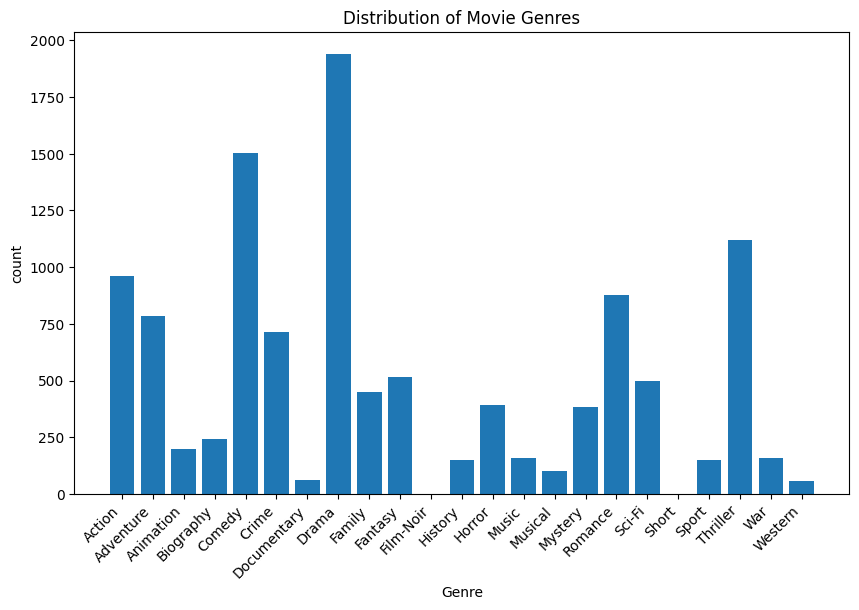

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(grouped['Genre'], grouped['count'])
plt.xlabel('Genre')
plt.ylabel('count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Movie Genres')
plt.show()

In [ ]:
top_10_genres = grouped.sort_values(by='count', ascending=False).head(10)

In [ ]:
top_10_genres

,Genre,count,sum,mean,median,std,var,mode,max,min,range
7,Drama,1940,13165.1,6.786134,6.9,0.891325,0.794460,6.7,9.3,2.1,7.2
4,Comedy,1503,9295.3,6.184498,6.3,1.037983,1.077409,6.7,8.8,1.9,6.9
20,Thriller,1118,7129.9,6.377370,6.4,0.966010,0.933176,6.5,9.0,2.7,6.3
0,Action,961,6044.8,6.290114,6.3,1.031734,1.064475,6.1,9.0,2.1,6.9
16,Romance,877,5638.4,6.429190,6.5,0.967268,0.935608,6.5,8.5,2.1,6.4
1,Adventure,786,5075.8,6.457761,6.6,1.108736,1.229296,6.7,8.9,2.3,6.6
5,Crime,714,4673.0,6.544818,6.6,0.980158,0.960709,6.6,9.3,2.4,6.9
9,Fantasy,514,3233.1,6.290078,6.4,1.129870,1.276607,6.7,8.9,2.2,6.7
17,Sci-Fi,497,3142.4,6.322736,6.4,1.156096,1.336559,6.7,8.8,1.9,6.9
8,Family,450,2794.7,6.210444,6.3,1.162576,1.351583,6.7,8.6,1.9,6.7


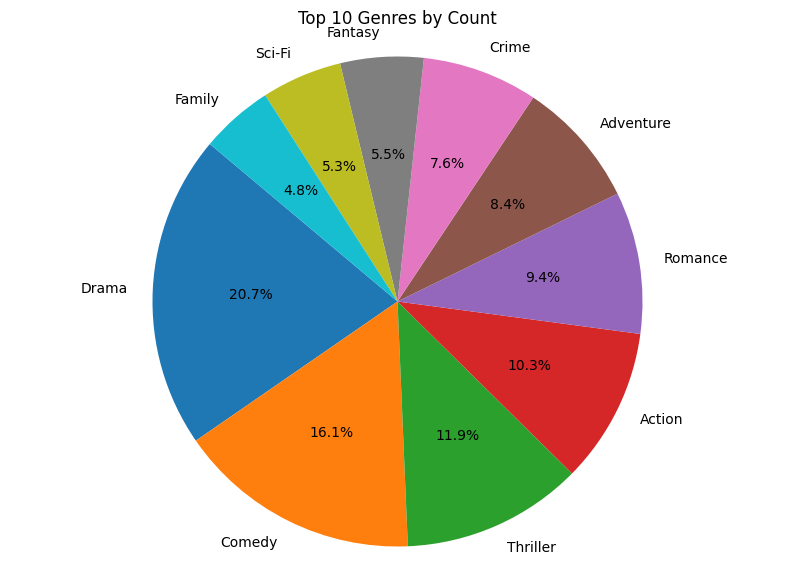

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_10_genres['count'], labels=top_10_genres['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Genres by Count')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Filter top 7 genres based on count
top_7_genres = grouped.sort_values(by='count', ascending=False).head(7)

In [ ]:
top_7_genres

,Genre,count,sum,mean,median,std,var,mode,max,min,range
7,Drama,1940,13165.1,6.786134,6.9,0.891325,0.794460,6.7,9.3,2.1,7.2
4,Comedy,1503,9295.3,6.184498,6.3,1.037983,1.077409,6.7,8.8,1.9,6.9
20,Thriller,1118,7129.9,6.377370,6.4,0.966010,0.933176,6.5,9.0,2.7,6.3
0,Action,961,6044.8,6.290114,6.3,1.031734,1.064475,6.1,9.0,2.1,6.9
16,Romance,877,5638.4,6.429190,6.5,0.967268,0.935608,6.5,8.5,2.1,6.4
1,Adventure,786,5075.8,6.457761,6.6,1.108736,1.229296,6.7,8.9,2.3,6.6
5,Crime,714,4673.0,6.544818,6.6,0.980158,0.960709,6.6,9.3,2.4,6.9


In [ ]:
# Reshape the data for seaborn
top_7_genres_long = top_7_genres.melt(id_vars='Genre', value_vars=['mean', 'median', 'mode', 'max', 'min', 'std', 'var', 'range'],
                                  var_name='Statistic', value_name='Value')

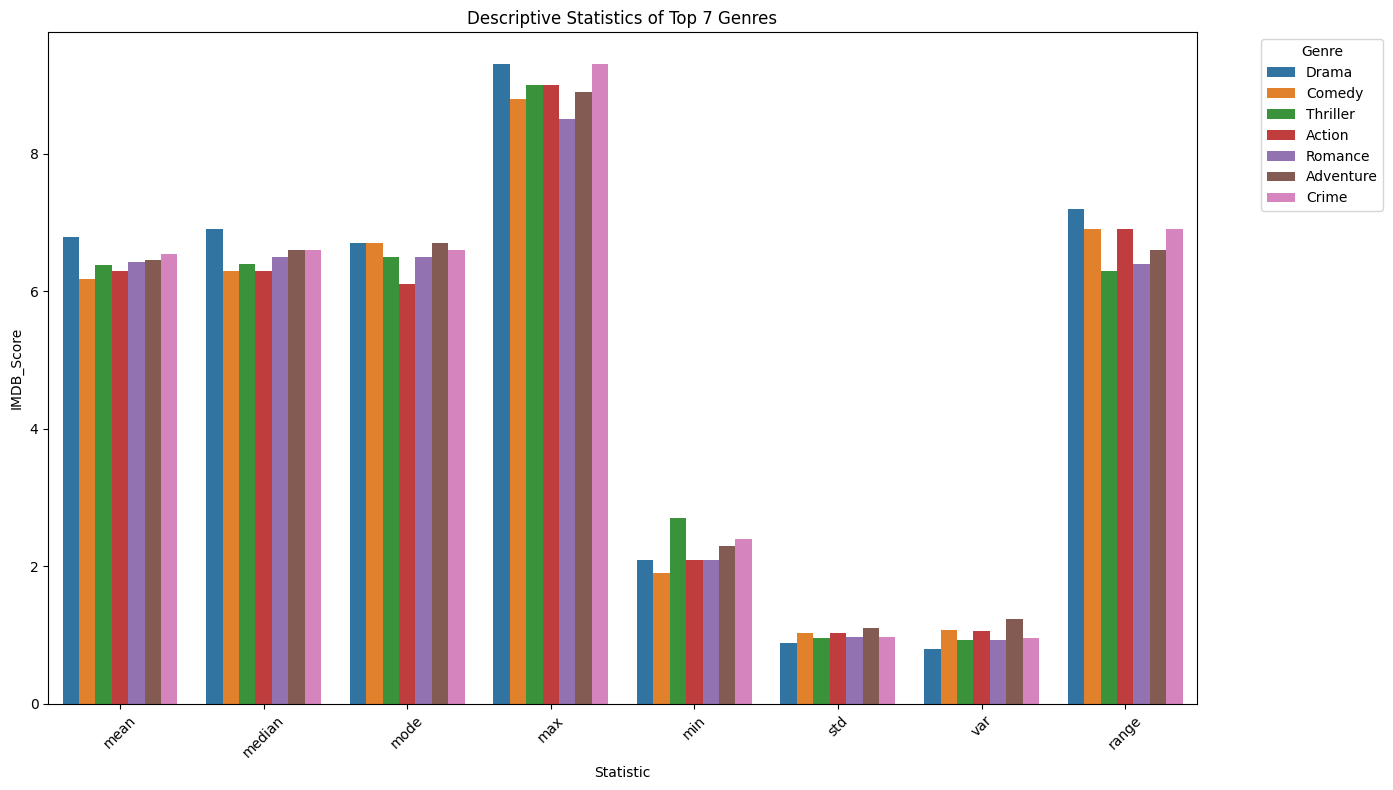

In [ ]:
# Plotting the bar graph using seaborn
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Statistic', y='Value', hue='Genre', data=top_7_genres_long)
plt.title('Descriptive Statistics of Top 7 Genres')
plt.xlabel('Statistic')
plt.ylabel('IMDB_Score')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Movie Duration Analysis
data_frame_1[['movie_title', 'duration', 'imdb_\nscore']]

,movie_title,duration,imdb_\nscore
0,The Shawshank RedemptionÂ,142,9.3
1,The Dark KnightÂ,152,9.0
2,InceptionÂ,148,8.8
3,Fight ClubÂ,151,8.8
4,Pulp FictionÂ,178,8.9
...,...,...,...
3842,Time to ChooseÂ,100,7.0
3843,Call + ResponseÂ,86,7.5
3844,The Knife of Don JuanÂ,110,7.2
3845,Born to Fly: Elizabeth Streb vs. GravityÂ,82,6.8


In [ ]:
import statistics

In [ ]:
a = statistics.mean(data_frame_1['duration'].astype(int))

In [ ]:
print("Mean is :", a)

Mean is : 109.93007538341566


In [ ]:
b = statistics.median(data_frame_1['duration'].astype(int))

In [ ]:
print("Median is :", b)

Median is : 106


In [ ]:
c = statistics.mode(data_frame_1['duration'].astype(int))

In [ ]:
print("Mode is :", c)

Mode is : 101


In [ ]:
d = statistics.variance(data_frame_1['duration'].astype(int))

In [ ]:
print("Variance is :", d)

Variance is : 517.69687734741


In [ ]:
e = statistics.stdev(data_frame_1['duration'].astype(int))

In [ ]:
print("Standard Deviation is :", e)

Standard Deviation is : 22.75295315662145


In [ ]:
duration_analysis_df = pd.DataFrame({
    'mean': [data_frame_1['duration'].mean()],
    'median': [data_frame_1['duration'].median()],
    'mode': [data_frame_1['duration'].mode()[0]],
    'std': [data_frame_1['duration'].std()],
    'var': [data_frame_1['duration'].var()],
    'max': [data_frame_1['duration'].max()],
    'min': [data_frame_1['duration'].min()]
})

In [ ]:
# Rename the index to 'movie_duration'
duration_analysis_df = duration_analysis_df.rename_axis('movie_duration')


In [ ]:
duration_analysis_df

,mean,median,mode,std,var,max,min
movie_duration,,,,,,,
0,109.930075,106.0,101,22.752953,517.696877,330,34


In [ ]:
duration_analysis_df_1 = data_frame_1['duration'].describe()

In [ ]:
print(duration_analysis_df_1)

count    3847.000000
mean      109.930075
std        22.752953
min        34.000000
25%        95.000000
50%       106.000000
75%       120.000000
max       330.000000
Name: duration, dtype: float64


In [ ]:
max_duration = data_frame_1['duration'].max()

In [ ]:
movie_with_max_duration = data_frame_1.loc[data_frame_1['duration'] == max_duration]

In [ ]:
name_of_movie_with_max_duration = movie_with_max_duration['movie_title'].values[0]

In [ ]:
IMDB_Score_of_movie_with_max_duration = movie_with_max_duration['imdb_\nscore'].values[0]

In [ ]:
print(f"The movie with the longest duration is '{name_of_movie_with_max_duration}' with a duration of {max_duration} minutes and IMDB Score of {IMDB_Score_of_movie_with_max_duration}")

The movie with the longest duration is 'Blood In, Blood OutÂ ' with a duration of 330 minutes and IMDB Score of 8.0


In [ ]:
min_duration = data_frame_1['duration'].min()

In [ ]:
movie_with_min_duration = data_frame_1.loc[data_frame_1['duration'] == min_duration]

In [ ]:
name_of_movie_with_min_duration = movie_with_min_duration['movie_title'].values[0]

In [ ]:
IMDB_Score_of_movie_with_min_duration = movie_with_min_duration['imdb_\nscore'].values[0]

In [ ]:
print(f"The movie with the shortest duration is '{name_of_movie_with_min_duration}' with a duration of {min_duration} minutes and IMDB Score of {IMDB_Score_of_movie_with_min_duration}")

The movie with the shortest duration is 'Marilyn Hotchkiss' Ballroom Dancing and Charm SchoolÂ ' with a duration of 34 minutes and IMDB Score of 7.1


In [ ]:
print(max_duration)

330


In [ ]:
print(min_duration)

34


In [ ]:
f = max_duration - min_duration

In [ ]:
print("Range is:", f)

Range is: 296


<Axes: xlabel='duration', ylabel='imdb_\nscore'>

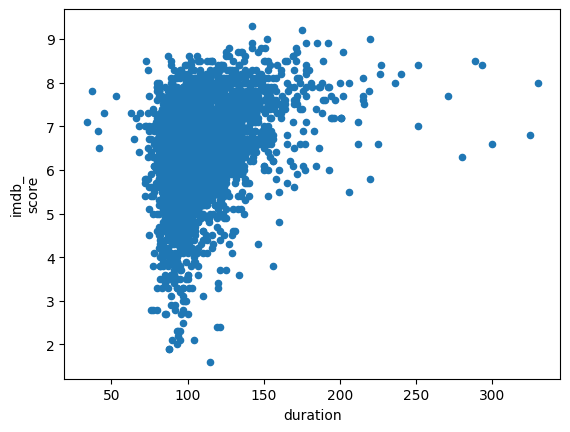

In [ ]:
data_frame_1.plot(x='duration', y='imdb_\nscore', kind='scatter')

In [ ]:
#Language Analysis
data_frame_1[['movie_title', 'language', 'imdb_\nscore']]

,movie_title,language,imdb_\nscore
0,The Shawshank RedemptionÂ,English,9.3
1,The Dark KnightÂ,English,9.0
2,InceptionÂ,English,8.8
3,Fight ClubÂ,English,8.8
4,Pulp FictionÂ,English,8.9
...,...,...,...
3842,Time to ChooseÂ,English,7.0
3843,Call + ResponseÂ,English,7.5
3844,The Knife of Don JuanÂ,Spanish,7.2
3845,Born to Fly: Elizabeth Streb vs. GravityÂ,English,6.8


In [ ]:
grouped_df = data_frame_1.groupby('language')

In [ ]:
grouped_df['imdb_\nscore'].agg(['count', 'mean', 'median', 'std'])

,count,mean,median,std
language,,,,
Aboriginal,2,6.950000,6.95,0.777817
Arabic,1,7.200000,7.20,NaN
Aramaic,1,7.100000,7.10,NaN
Bosnian,1,4.300000,4.30,NaN
Cantonese,8,7.237500,7.30,0.440576
Czech,1,7.400000,7.40,NaN
Danish,3,7.900000,8.10,0.529150
Dari,2,7.500000,7.50,0.141421
Dutch,3,7.566667,7.80,0.404145


In [ ]:
g = statistics.mode(data_frame_1['language'])

In [ ]:
print('Mode is:', g)

Mode is: English


In [ ]:
# Create a pivot table with language as the columns
data_frame_2 = data_frame_1.pivot_table(values='imdb_\nscore', index='language', columns=None, aggfunc='count')

In [ ]:
data_frame_2

,imdb_\nscore
language,
Aboriginal,2
Arabic,1
Aramaic,1
Bosnian,1
Cantonese,8
Czech,1
Danish,3
Dari,2
Dutch,3


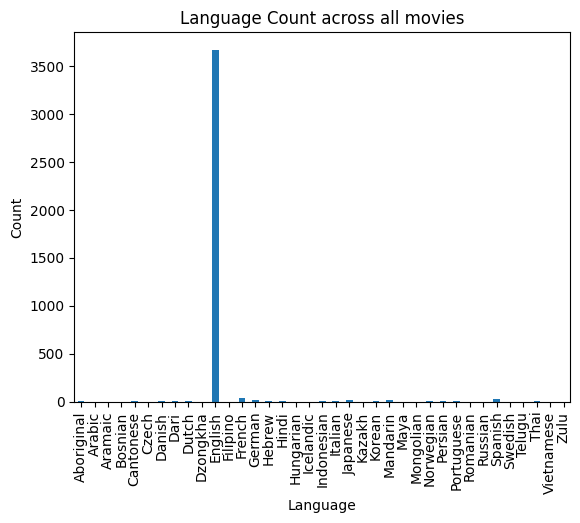

In [ ]:
data_frame_2.plot(kind='bar', legend=False)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Count across all movies')
plt.show()

In [ ]:
#Director Analysis
mean_scores = data_frame_1.groupby('director_\nname')['imdb_\nscore'].mean()

In [ ]:
sorted_mean_scores = mean_scores.sort_values(ascending=False)

In [ ]:
top_10_directors = sorted_mean_scores.head(10)

In [ ]:
top_10_directors

director_\nname
Charles Chaplin          8.600000
Tony Kaye                8.600000
Damien Chazelle          8.500000
Alfred Hitchcock         8.500000
Majid Majidi             8.500000
Ron Fricke               8.500000
Sergio Leone             8.433333
Christopher Nolan        8.425000
Asghar Farhadi           8.400000
Marius A. Markevicius    8.400000
Name: imdb_\nscore, dtype: float64

In [ ]:
top_10_directors_1 = sorted_mean_scores.head(10).index

In [ ]:
top_10_directors_df = data_frame_1[data_frame_1['director_\nname'].isin(top_10_directors_1)]

In [ ]:
highest_score_movies_of_top_10_directors = top_10_directors_df.loc[top_10_directors_df.groupby('director_\nname')['imdb_\nscore'].idxmax()]

In [ ]:
required_columns = highest_score_movies_of_top_10_directors[['director_\nname', 'imdb_\nscore', 'movie_title', 'profit']]

In [ ]:
required_columns

,director_\nname,imdb_\nscore,movie_title,profit
150,Alfred Hitchcock,8.5,PsychoÂ,31193053
1417,Asghar Farhadi,8.4,A SeparationÂ,6598492
820,Charles Chaplin,8.6,Modern TimesÂ,-1336755
1,Christopher Nolan,9.0,The Dark KnightÂ,348316061
170,Damien Chazelle,8.5,WhiplashÂ,9792000
3059,Majid Majidi,8.5,Children of HeavenÂ,745402
3620,Marius A. Markevicius,8.4,The Other Dream TeamÂ,-366222
3173,Ron Fricke,8.5,SamsaraÂ,-1398153
460,Sergio Leone,8.9,"The Good, the Bad and the UglyÂ",4900000
35,Tony Kaye,8.6,American History XÂ,-787759


from matplotlib import pyplot as plt
required_columns['imdb_\nscore'].plot(kind='hist', bins=20, title='imdb_\nscore')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
required_columns['profit'].plot(kind='hist', bins=20, title='profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
required_columns.plot(kind='scatter', x='imdb_\nscore', y='profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
required_columns['imdb_\nscore'].plot(kind='line', figsize=(8, 4), title='imdb_\nscore')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
required_columns['profit'].plot(kind='line', figsize=(8, 4), title='profit')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
mean_scores_df = pd.DataFrame({
    'director_\nname': sorted_mean_scores.head(10).index,
    'mean_imdb_score': sorted_mean_scores.head(10).values
})

In [ ]:
highest_scores_df = required_columns[['director_\nname', 'imdb_\nscore']].rename(columns={'imdb_\nscore': 'highest_imdb_score'})

In [ ]:
combined_df = pd.merge(mean_scores_df, highest_scores_df, on='director_\nname')

In [ ]:
combined_df

,director_\nname,mean_imdb_score,highest_imdb_score
0,Charles Chaplin,8.600000,8.6
1,Tony Kaye,8.600000,8.6
2,Damien Chazelle,8.500000,8.5
3,Alfred Hitchcock,8.500000,8.5
4,Majid Majidi,8.500000,8.5
5,Ron Fricke,8.500000,8.5
6,Sergio Leone,8.433333,8.9
7,Christopher Nolan,8.425000,9.0
8,Asghar Farhadi,8.400000,8.4
9,Marius A. Markevicius,8.400000,8.4


<Axes: xlabel='director_\nname'>

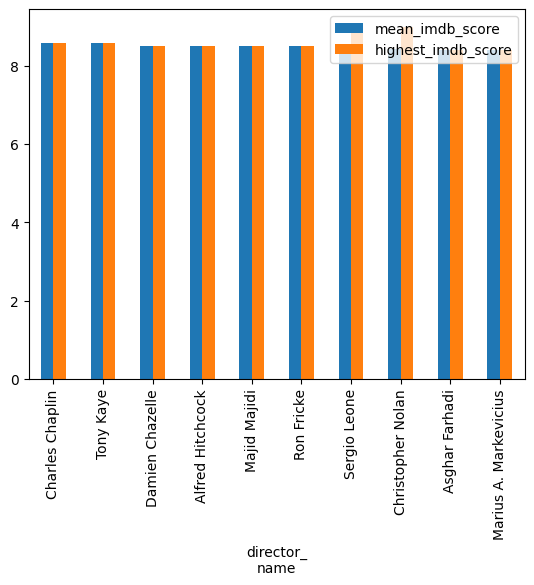

In [ ]:
combined_df.plot(x="director_\nname", y=["mean_imdb_score", "highest_imdb_score"], kind="bar")

In [ ]:
# Budget Analysis:
data_frame_1[['gross', 'budget', 'profit']]

,gross,budget,profit
0,28341469,25000000,3341469
1,533316061,185000000,348316061
2,292568851,160000000,132568851
3,37023395,63000000,-25976605
4,107930000,8000000,99930000
...,...,...,...
3842,29233,3500000,-3470767
3843,215185,200000,15185
3844,3830,1200000,-1196170
3845,21199,500000,-478801


<Axes: >

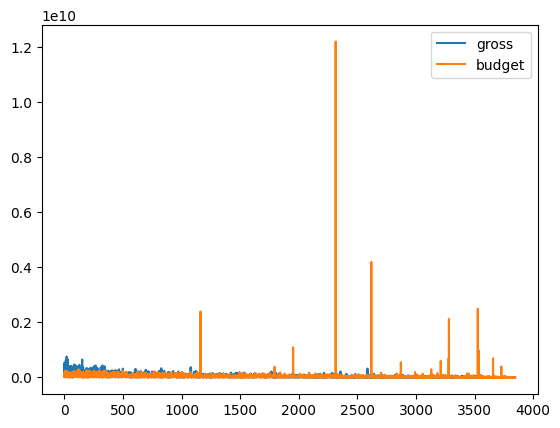

In [ ]:
data_frame_1[['gross', 'budget']].plot()

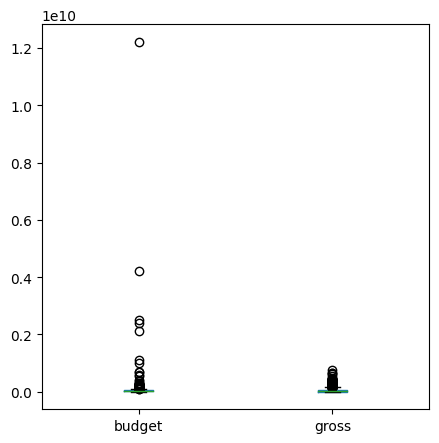

In [ ]:
boxplot = data_frame_1[["budget", "gross"]].boxplot(figsize = (5,5), grid = False)

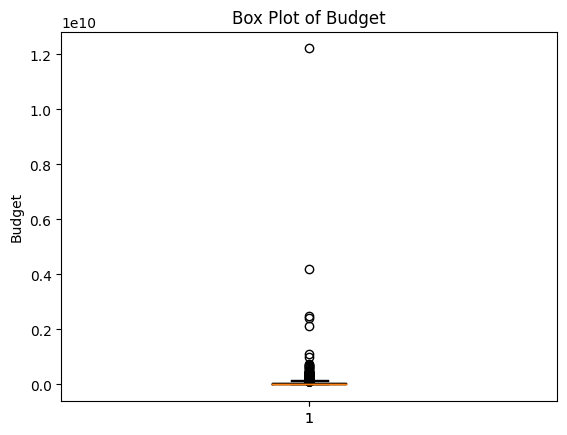

In [ ]:
plt.boxplot(data_frame_1['gross'].dropna())
plt.title('Box Plot of Gross')
plt.ylabel('Gross')
plt.boxplot(data_frame_1['budget'].dropna())
plt.title('Box Plot of Budget')
plt.ylabel('Budget')
plt.show()

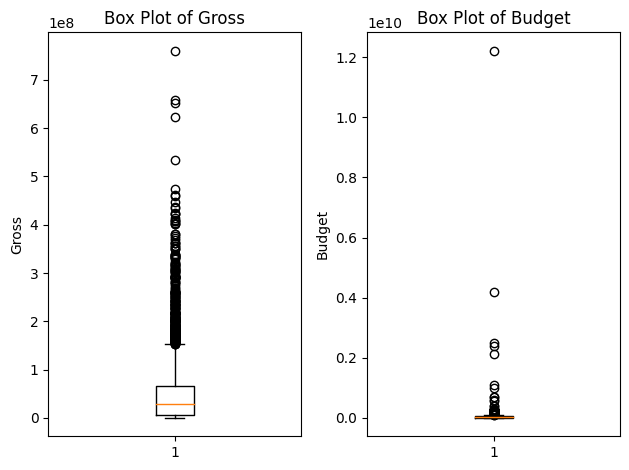

In [ ]:
# Box plot for the 'gross' column
plt.subplot(1, 2, 1)
plt.boxplot(data_frame_1['gross'].dropna())
plt.title('Box Plot of Gross')
plt.ylabel('Gross')

# Box plot for the 'budget' column
plt.subplot(1, 2, 2)
plt.boxplot(data_frame_1['budget'].dropna())
plt.title('Box Plot of Budget')
plt.ylabel('Budget')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
sorted_df = data_frame_1.sort_values(by='profit', ascending=False)

In [ ]:
top_10_profitable_movies = sorted_df.head(10)

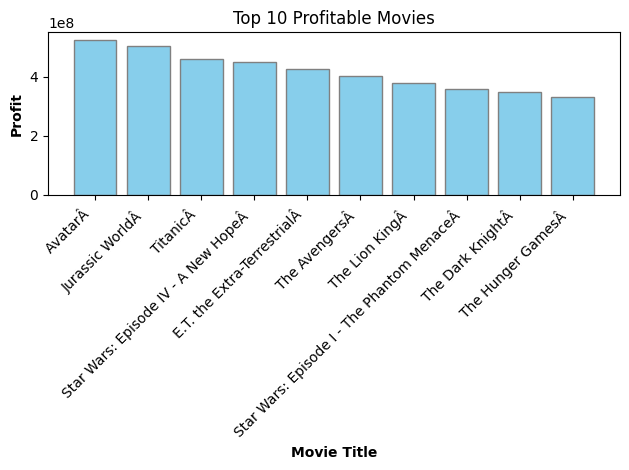

In [ ]:
# Plotting the bar graph
plt.bar(top_10_profitable_movies['movie_title'], top_10_profitable_movies['profit'], color='skyblue', edgecolor='grey')

# Adding titles and labels
plt.xlabel('Movie Title', fontweight='bold')
plt.ylabel('Profit', fontweight='bold')
plt.title('Top 10 Profitable Movies')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()